In [1]:
import numpy as np
import pImpactR as impact
import matplotlib.pyplot as plt
int=np.vectorize(int)

# Matched Beam Generation

### general simulation settings

In [2]:
n_particles = 100000
mass = impact.util.Me
ke = 100*1.0e6  #100 MeV electron beam
energy = ke+mass
Espread = 1.0e-4
freq = 30*1.0e6
emitN = 1.0e-05

In [3]:
beam = impact.getBeam()
beam.current = 0.0  # no space-charge
beam.kinetic_energy = ke
beam.mass = mass
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 4
beam.nCore_z = 2
beam.n_particles = n_particles

### NL parameter and prepare matched beam

In [4]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3
alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

#beam.distribution.distribution_type = 'IOTA_Waterbag'
beam.distribution.distribution_type = 'IOTA_Gauss'
beam.distribution.CL = 1.5
beam.distribution.betx = betaEntrance
beam.distribution.alfx = alfaEntrance
beam.distribution.NL_t = NL_t
beam.distribution.NL_c = NL_c
beam.distribution.emitx = emitN
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0
beam.distribution.emitz = (Espread*energy*1.0e-6)**2*beam.distribution.betz

In [5]:
lattice=[impact.getElem('loop')]
lattice[0].turns = 0 # empty lattice 
impact.writeInputFile(beam,lattice)
impact.run(beam)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


0

In [6]:
cat test.in

!================= Beam & Control Parameters ================= 
4 2 
6 100000 1 0 1 
32 32 32 1 0.014 0.014 0.1 
82 0 0 1 
100000 
0.0 
1.0657889726792521e-09 
0.4 0.01 1.8926320036288808 -2.7527638409423467 1e-05 1.5 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.03508495730895863 0.019669513367455125 0.0 1.0 1.0 0.0 0.0 
0.0 100000000.0 510998.91 -1.0 30000000.0 0.0 
!========================== Lattice ========================== 
0.0 0 0 -16 0.0 0 / 


### Poincare Plot

In [7]:
ls

fort.111110  fort.18  fort.25  fort.27  fort.29  fort.32        log.impact_std
fort.111111  fort.24  fort.26  fort.28  fort.30  ImpactR.ipynb  test.in


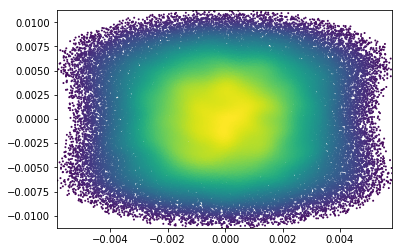

In [8]:
# fort.111110 and fort.111111 are particle data before and after simulation respectively.
_x = 0 
_y = 2
pData=impact.readParticleData(-111110,ke,mass,freq)
impact.plot.poincare(pData[:,_x],pData[:,_y])

# TBT (turn by turn)

In [9]:
lattice

[
   type: 'loop'
  turns: 0]

In [ ]:
alfaEntrance